In [1]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from collections import defaultdict

In [2]:
%matplotlib inline

In [3]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})

In [4]:
import ngauge
from ngauge import Neuron

ngauge.__version__

'0.1.5'

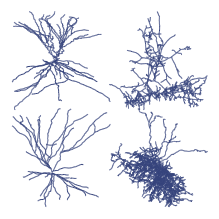

In [5]:
# Here, we print out 4 neuron structures for the figure top left hand corner

# Load the files
files = [ Neuron.from_swc(x) for x in open('files.txt').read().splitlines() ]

# Create a new 3"x3" figure
fig = plt.figure()
fig.set_figheight(3)
fig.set_figwidth(3)

# Adds an offset to shift the 
xshift, yshift = -0.05, -0.05

# Plot 4 figures in a grid
for (x,y,i) in [ (0,0,3), (0,0.5+yshift,0), (0.5+xshift,0.5+yshift,7), (0.5+xshift,0,-3) ]:
    ax = fig.add_axes([x,y,.5,.5])
    ax.axis('off')
    files[i].plot(fig=fig, ax=ax, color=(52/256, 66/256, 123/256) )

# Adjust and save the figure
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig( 'PanelOverview.pdf', transparent=True )

In [6]:
%%timeit

# Time the process of loading the SWC file and calculating the width
files = [ Neuron.from_swc(x) for x in open('files.txt').read().splitlines() ]
widths = [ x.total_width() for x in files ]

2 s ± 32.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
# Calculate the baseline answer outside of benchmark
files = [ Neuron.from_swc(x) for x in open('files.txt').read().splitlines() ]
widths = [ x.total_width() for x in files ]
height = [ x.total_height() for x in files ]

In [8]:
# Load calculated LMeasure results with a quick parser
from_lmeasure = defaultdict( lambda: {} )
for line in (x.split() for x in open('lmeasure_public_width','r').read().splitlines()):
    if len( line ) == 0:
        continue
    from_lmeasure[ line[0] ][ line[1] ] = line[2]

In [9]:
# Assemble the data for plotting
to_plot_widths = [ [], [], [] ]

for key in from_lmeasure.keys():
    to_plot_widths[1].append( float( from_lmeasure[key]['Width'] ) )
    
    test = Neuron.from_swc( './public_data_flat/' + key.split('/')[-1] )
    points = [ x.x for x in test.iter_all_points() ]
    test = abs( np.percentile( points, 2.5 ) - np.percentile( points, 97.5 ) )
    
    to_plot_widths[0].append( test )
    to_plot_widths[2].append( Neuron.from_swc( './public_data_flat/' + key.split('/')[-1] ).total_width() )

In [10]:
# Here are the results from testing LMeasure on our server, copied from the terminal `time` command
panelA_lmeasure_time = [6.99,7.04,6.94,6.94]
panelA_ngauge_time, panelA_ngauge_std = 2.82, 0.05

# Convert raw time measurements into a mean+/-std
panelA_lmeasure_time, panelA_lmeasure_std = np.mean( panelA_lmeasure_time ), np.std( panelA_lmeasure_time )

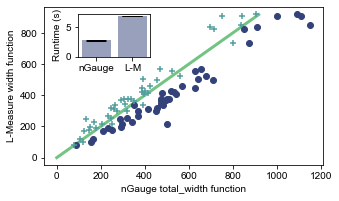

In [11]:
# Create the composite first-panel figure

fig = plt.figure()

fig.set_figheight(3)
fig.set_figwidth(5)

ax = fig.add_subplot(111)
midline_range = list(range(int(max( max(to_plot_widths[0]), max(to_plot_widths[1]) ) ) ) )

ax.plot( midline_range, color=(115/256,196/256,132/256), linewidth=3, zorder=0 )
ax.scatter( to_plot_widths[2], to_plot_widths[1], color=(52/256, 66/256, 123/256), zorder=10 )
ax.scatter( to_plot_widths[0], to_plot_widths[1], color=(81/256,160/256,160/256), zorder=10, marker='+' )

ax.set_xlabel('nGauge total_width function')
ax.set_ylabel('L-Measure width function')

inax = fig.add_axes([0.22,0.65,.2,.20], zorder=100)
inax.bar([1,2], [panelA_ngauge_time,panelA_lmeasure_time], yerr=[panelA_ngauge_std,panelA_lmeasure_std], align='center', alpha=0.5, ecolor='black', capsize=10, color=(52/256, 66/256, 123/256) )
inax.set_xticks( [1,2] )
inax.set_xticklabels( ['nGauge','L-M'] )
inax.set_ylabel('Runtime (s)')

plt.gcf().subplots_adjust(bottom=0.15)

plt.savefig( 'PanelA.pdf', transparent=True )

### Below this point, the same process is repeated for the other 2 panels

In [12]:
%%timeit

# Run benchmark for total_tip_nodes
files = [ Neuron.from_swc(x) for x in open('files.txt').read().splitlines() ]
widths = [ x.total_tip_nodes() for x in files ]

1.92 s ± 23.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
files = [ Neuron.from_swc(x) for x in open('files.txt').read().splitlines() ]
widths = [ x.total_tip_nodes() for x in files ]

In [14]:
from_lmeasure = defaultdict( lambda: {} )

for line in (x.split() for x in open('lmeasure_public_tips','r').read().splitlines()):
    if len( line ) == 0:
        continue
    from_lmeasure[ line[0] ][ line[1] ] = line[2]

In [15]:
to_plot_tips = [ [], [] ]

for key in from_lmeasure.keys():
    to_plot_tips[1].append( float( from_lmeasure[key]['N_tips'] ) )
    to_plot_tips[0].append( Neuron.from_swc( './public_data_flat/' + key.split('/')[-1] ).total_tip_nodes() )
    

In [16]:
panelB_lmeasure_time = [6.51,6.84,6.50,6.52]
panelB_ngauge_time, panelB_ngauge_std = 2.5, 0.05

panelB_lmeasure_time, panelB_lmeasure_std = np.mean( panelB_lmeasure_time ), np.std( panelB_lmeasure_time )

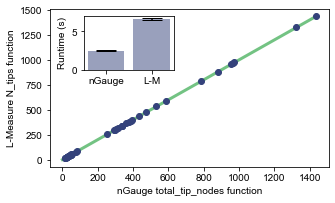

In [17]:
fig = plt.figure()

fig.set_figheight(3)
fig.set_figwidth(5)

ax = fig.add_subplot(111)

midline_range = list(range(int(max( max(to_plot_tips[0]), max(to_plot_tips[1]) ) ) ) )

ax.plot( midline_range, color=(115/256,196/256,132/256), linewidth=3, zorder=0 )
ax.scatter( to_plot_tips[0], to_plot_tips[1], color=(52/256, 66/256, 123/256), zorder=10 )
ax.set_xlabel('nGauge total_tip_nodes function')
ax.set_ylabel('L-Measure N_tips function')

inax = fig.add_axes([0.22,0.6,.25,.25])
inax.bar([1,2], [panelB_ngauge_time,panelB_lmeasure_time], yerr=[panelB_ngauge_std,panelB_lmeasure_std], align='center', alpha=0.5, ecolor='black', capsize=10, color=(52/256, 66/256, 123/256) )
inax.set_xticks( [1,2] )
inax.set_xticklabels( ['nGauge','L-M'] )
inax.set_ylabel('Runtime (s)')

plt.gcf().subplots_adjust(bottom=0.15)

plt.savefig( 'PanelB.pdf', transparent=True )

In [18]:
%%timeit

files = [ Neuron.from_swc(x) for x in open('files.txt').read().splitlines() ]
widths = [ max( sum( ( [ x.path_dist_to_root() for x in branch.get_tip_nodes() ] for branch in file.branches ), [] ) ) for file in files ]

5.5 s ± 37.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
from_lmeasure = defaultdict( lambda: {} )

for line in (x.split() for x in open('lmeasure_public_path','r').read().splitlines()):
    if len( line ) == 0:
        continue
    from_lmeasure[ line[0] ][ line[1] ] = line[7]

In [20]:
to_plot_path = [ [], [] ]

for key in from_lmeasure.keys():
    to_plot_path[1].append( float( from_lmeasure[key]['PathDistance'] ) )
    
    to_plot_path[0].append( max( sum( ( [ x.path_dist_to_root() for x in branch.get_tip_nodes() ] for branch in Neuron.from_swc( './public_data_flat/' + key.split('/')[-1] ).branches ), [] ) ) )

In [21]:
panelC_lmeasure_time = [6.51,6.70,6.56,6.55]
panelC_ngauge_time, panelC_ngauge_std = 5.92, 0.232

panelC_lmeasure_time, panelC_lmeasure_std = np.mean( panelC_lmeasure_time ), np.std( panelC_lmeasure_time )

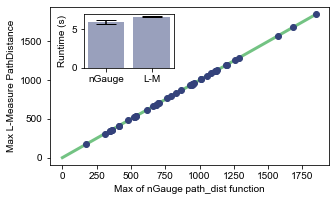

In [22]:
fig = plt.figure()

fig.set_figheight(3)
fig.set_figwidth(5)

ax = fig.add_subplot(111)

midline_range = list(range(int(max( max(to_plot_path[0]), max(to_plot_path[1]) ) ) ) )

ax.plot( midline_range, color=(115/256,196/256,132/256), linewidth=3, zorder=0 )
ax.scatter( to_plot_path[0], to_plot_path[1], color=(52/256, 66/256, 123/256), zorder=10 )
ax.set_xlabel('Max of nGauge path_dist function')
ax.set_ylabel('Max L-Measure PathDistance')

inax = fig.add_axes([0.22,0.6,.25,.25])
inax.bar([1,2], [panelC_ngauge_time,panelC_lmeasure_time], yerr=[panelC_ngauge_std,panelC_lmeasure_std], align='center', alpha=0.5, ecolor='black', capsize=10, color=(52/256, 66/256, 123/256) )
inax.set_xticks( [1,2] )
inax.set_xticklabels( ['nGauge','L-M'] )
inax.set_ylabel('Runtime (s)')

plt.gcf().subplots_adjust(bottom=0.15)

plt.savefig( 'PanelC.pdf', transparent=True )